In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation

In [40]:
train = pd.read_csv("train.csv")

In [41]:
prep_df = train[['buyer_id', 'item_id']] # может еще взять count?
prep_df['cat'] = prep_df['item_id'].apply(lambda x: int(str(x)[:3]))
del prep_df['item_id']
user_items_count = prep_df['buyer_id'].value_counts()
user_cat_count = prep_df.value_counts()

<ipython-input-41-90c5fda747c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prep_df['cat'] = prep_df['item_id'].apply(lambda x: int(str(x)[:3]))


In [42]:
for i in user_cat_count.index:
    user_cat_count.loc[i] = user_cat_count[i] / user_items_count[i[0]]
    
test_df = pd.DataFrame(columns=['buyer_id'] + list(user_cat_count.index.get_level_values('cat').unique()))
test_df['buyer_id'] = list(user_cat_count.index.get_level_values('buyer_id').unique())
test_df.fillna(0, inplace=True)

In [43]:
for i in user_cat_count.index:
    test_df.loc[test_df['buyer_id'] == i[0], i[1]] = user_cat_count[i]

In [44]:
del test_df[218]

In [45]:
test_df


,buyer_id,202,203,204,205,211,207,210,212,213,216,215,209,217,214,206
0,95474888,0.542969,0.326172,0.066406,0.025391,0.000000,0.023438,0.000000,0.015625,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
1,94740780,0.328704,0.422840,0.151235,0.035494,0.007716,0.035494,0.009259,0.004630,0.001543,0.000000,0.0,0.001543,0.0,0.001543,0.0
2,95363331,0.450586,0.410385,0.087102,0.035176,0.000000,0.013400,0.001675,0.001675,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
3,94807631,0.313821,0.437398,0.170732,0.024390,0.006504,0.022764,0.011382,0.006504,0.003252,0.001626,0.0,0.001626,0.0,0.000000,0.0
4,95355948,0.340102,0.455161,0.152284,0.023689,0.003384,0.013536,0.005076,0.003384,0.000000,0.003384,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47737,94800228,0.300000,0.300000,0.300000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
47738,95806500,0.300000,0.300000,0.000000,0.200000,0.000000,0.100000,0.100000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
47739,95412139,0.230769,0.230769,0.076923,0.230769,0.076923,0.076923,0.076923,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
47740,95067302,0.272727,0.272727,0.272727,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0


In [46]:
X_train_df = test_df.copy()
X_train_df.pop('buyer_id')
X_train = X_train_df.values
model = KMeans(n_clusters=7, random_state=7)
model.fit(X_train)
all_predictions = model.predict(X_train)
pred_df = pd.DataFrame(columns=['buyer_id', 'group_id'])
pred_df['buyer_id'] = test_df['buyer_id']
pred_df['group_id'] = all_predictions
pred_df.to_csv('user_class_df_train.csv')

In [17]:
## kmeans

In [28]:
# X_train_df = test_df.copy()
# X_train_df.pop('buyer_id')
# X_train = X_train_df.values
# distortions = []
# inertias = []
# mapping1 = {}
# mapping2 = {}
# K = range(1, 25)

# for k in K:
#     model = KMeans(n_clusters=k, random_state=7)
#     model.fit(X_train)
#     all_predictions = model.predict(X_train)
#     distortions.append(sum(np.min(cdist(X_train, model.cluster_centers_,
#                                             'euclidean'), axis=1)) / X_train.shape[0])
#     inertias.append(model.inertia_)
#     mapping1[k] = sum(np.min(cdist(X_train, model.cluster_centers_,
#                                    'euclidean'), axis=1)) / X_train.shape[0]
#     mapping2[k] = model.inertia_

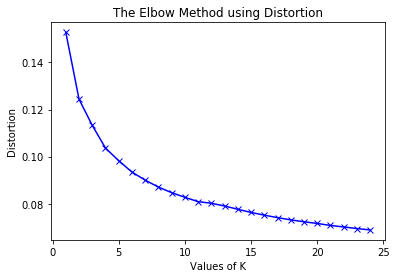

In [25]:
# plt.plot(K, distortions, 'bx-')
# plt.xlabel('Values of K')
# plt.ylabel('Distortion')
# plt.title('The Elbow Method using Distortion')
# plt.show()

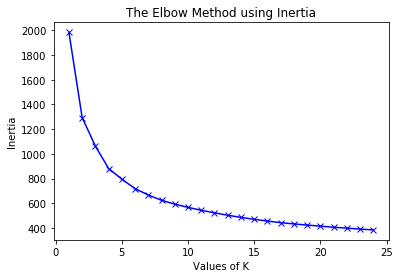

In [26]:
# plt.plot(K, inertias, 'bx-')
# plt.xlabel('Values of K')

# plt.ylabel('Inertia')
# plt.title('The Elbow Method using Inertia')
# plt.show()

In [ ]:
фикс сида + 7 кластеров для трейна + всего датасета

In [48]:
len(train.buyer_id.unique())

47742

In [49]:
len(pred_df.buyer_id.unique())

47742

In [50]:
train[train.buyer_id == 4620121727]

,buyer_id,pav_order_id,created,item_id,count,price_sold,flag_weight_goods,weight
